In [14]:

from sklearn.cluster import KMeans
#go through each file
#clean_PATH
import numpy as np
import os
import pandas as pd
from IPython.display import clear_output
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D
%matplotlib inline

In [18]:
#resample the data to 50Hz @later
labels = list()
Features = list()

#data_prep = pd.DataFrame(columns = ['Accel_WR_X_CAL','Accel_WR_Y_CAL','Accel_WR_Z_CAL','Activity'])
# prepare dataset sliding windwos but no overlap
PATH = '../data/p1'
for instance in os.listdir(PATH):
    
    instance_df = pd.read_csv(PATH + '/' +instance)
    instance_df.reset_index(drop = True, inplace = True)
    for i in np.linspace(0,14.9,150):
        #print(i)
        inst_df = instance_df.loc[i*200:(i+0.1)*200]
        inst_df.reset_index(drop = True, inplace = True)
        inst_df = inst_df[0:20]
        #print(inst_df.shape)
        labels.append(instance[:-4])
        feat_x = inst_df['Accel_WR_X_CAL']
        feat_y = inst_df['Accel_WR_Y_CAL']
        feat_z = inst_df['Accel_WR_Z_CAL']
        feat_xyz = np.array([feat_x,feat_y,feat_z]).flatten()
        #print(feat_xyz.shape)
        Features.append(feat_xyz)

labels = np.array(labels)
Features = np.array(Features)

#train test split


In [19]:
Features.shape

(2700, 60)

In [20]:
np.linspace(0,19.75,80)

array([ 0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ,
        2.25,  2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,  4.  ,  4.25,
        4.5 ,  4.75,  5.  ,  5.25,  5.5 ,  5.75,  6.  ,  6.25,  6.5 ,
        6.75,  7.  ,  7.25,  7.5 ,  7.75,  8.  ,  8.25,  8.5 ,  8.75,
        9.  ,  9.25,  9.5 ,  9.75, 10.  , 10.25, 10.5 , 10.75, 11.  ,
       11.25, 11.5 , 11.75, 12.  , 12.25, 12.5 , 12.75, 13.  , 13.25,
       13.5 , 13.75, 14.  , 14.25, 14.5 , 14.75, 15.  , 15.25, 15.5 ,
       15.75, 16.  , 16.25, 16.5 , 16.75, 17.  , 17.25, 17.5 , 17.75,
       18.  , 18.25, 18.5 , 18.75, 19.  , 19.25, 19.5 , 19.75])

In [122]:
clust = KMeans(n_clusters = 4).fit(Features)

(array([1407.,    0.,    0.,  580.,    0.,    0.,  311.,    0.,    0.,
         402.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

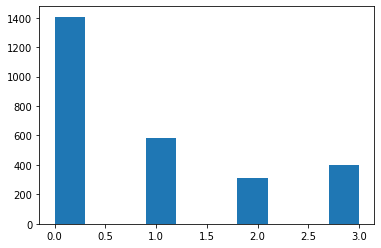

In [123]:
plt.hist(clust.labels_)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 <a list of 18 Text xticklabel objects>)

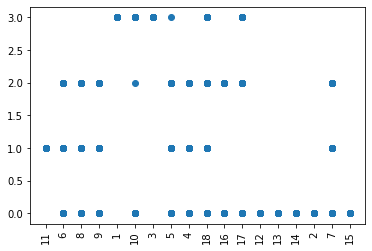

In [124]:
plt.scatter(labels,clust.labels_)
plt.xticks(rotation='vertical')

In [125]:
touch = group_df.get_group('walking_upstairs')
touch.reset_index(drop = True, inplace = True)


NameError: name 'group_df' is not defined

In [126]:
Featurest = list()
count = 0
Labelst = list()
for instance in os.listdir(PATH):
    instance_df = pd.read_csv(PATH + '/' +instance)
    instance_df.reset_index(drop = True, inplace = True)
    for i in np.linspace(15,20,50):
        #print(i)
        inst_df = instance_df.loc[i*200:(i+0.1)*200]
        inst_df.reset_index(drop = True, inplace = True)
        inst_df = inst_df[0:20]

        #labels.append(instance[:-4])
        feat_x = inst_df['Accel_WR_X_CAL']
        feat_y = inst_df['Accel_WR_Y_CAL']
        feat_z = inst_df['Accel_WR_Z_CAL']
        feat_xyz = np.array([feat_x,feat_y,feat_z]).flatten()
        #print(feat_xyz)
        #Featurest = list(Featurest)
        Featurest.append(feat_xyz)
        Labelst.append(int(instance[:-4]))
        #Featurest = np.array(Featurest)
        #print(clust.predict(Featurest[count].reshape(1,-1)))
        count = count+1
Featurest = np.array(Featurest)
#print(clust.predict(Featurest))
print(len(Labelst)/18)

50.0


In [127]:
data = np.zeros(shape = (18,18))
Labelst = Labelst - np.ones(len(Labelst))
confusion_df = pd.DataFrame(data,columns = list(set(Labelst)))
predict_matrix = pd.DataFrame(list(zip(Labelst, clust.predict(Featurest))), columns = ['true', 'pred'])
group_predicts = predict_matrix.groupby('true')

for group in group_predicts.groups:
    temp_df = group_predicts.get_group(group)['pred'].value_counts().reset_index()
    temp_df.columns = ['col', 'count']
    
    for col in temp_df['col']:
        confusion_df.iloc[int(group)][col] = temp_df[temp_df['col']== col]['count']
    
for key in list(set(Labelst)):
    confusion_df[key] = round((confusion_df[key]/50)*100,2)

print('true along y axis and predicted on x axis')
confusion_df

true along y axis and predicted on x axis


,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0
0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,24.0,56.0,18.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,54.0,36.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,28.0,60.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,26.0,60.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,26.0,62.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,26.0,60.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,78.0,0.0,4.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [128]:
predict_matrix = pd.DataFrame(list(zip(Labelst, clust.predict(Featurest))), columns = ['true', 'pred'])
group_predicts = predict_matrix.groupby('true')

Text(0.5, 1.0, 'Confusion Matrix')

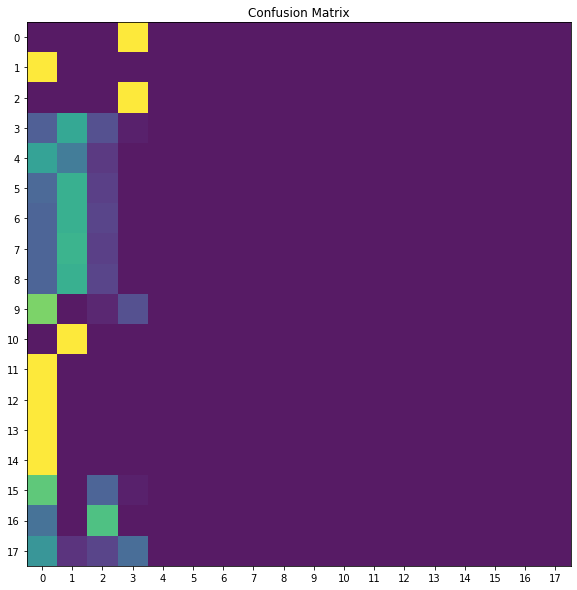

In [129]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(10,10))
plt.imshow(confusion_matrix(predict_matrix['true'],predict_matrix['pred']),cmap=plt.get_cmap('viridis'), alpha = 0.9)
plt.xticks(np.linspace(0,17,18))
plt.yticks(np.linspace(0,17,18))

plt.title('Confusion Matrix')


In [74]:
set(clust.predict(Featurest))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17}

# Classification

In [193]:
PATH = '../data/p3'
FeaturesC = list()
count = 0
LabelsC = list()
for instance in os.listdir(PATH):
    instance_df = pd.read_csv(PATH + '/' +instance)
    instance_df.reset_index(drop = True, inplace = True)
    for i in np.linspace(0,20,200):
        inst_df = instance_df.loc[i*200:(i+0.1)*200]
        inst_df.reset_index(drop = True, inplace = True)
        inst_df = inst_df[0:20]
        
        feat_x = inst_df['Accel_WR_X_CAL']
        feat_y = inst_df['Accel_WR_Y_CAL']
        feat_z = inst_df['Accel_WR_Z_CAL']
        feat_xyz = np.array([feat_x,feat_y,feat_z]).flatten()
        
        FeaturesC.append(feat_xyz)
        
        if int(instance[:-4]) in [4,5,6,7,8,9]:
            LabelsC.append('touch')
        
        else:
            LabelsC.append('no touch')
            
        count = count+1
FeaturesC = np.array(FeaturesC)
#print(clust.predict(Featurest))
print(len(LabelsC)/18)

200.0


In [194]:
pd.DataFrame(FeaturesC)

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,2.220096,2.315789,2.373206,2.449761,2.488038,2.583732,2.755981,2.794258,2.813397,2.928230,...,1.244019,1.244019,1.320574,1.282297,1.320574,1.377990,1.454545,1.492823,1.473684,1.550239
1,2.851675,2.851675,2.889952,2.775120,2.755981,2.736842,2.717703,2.583732,2.679426,2.526316,...,1.799043,1.645933,1.588517,1.492823,1.377990,1.263158,1.186603,1.033493,0.899522,0.842105
2,1.760766,1.799043,1.818182,1.875598,1.894737,1.952153,2.143541,2.277512,2.430622,2.468900,...,0.727273,0.918660,0.899522,0.937799,1.033493,1.090909,1.014354,1.014354,0.956938,0.995215
3,2.851675,2.985646,3.023923,3.100478,3.196172,3.253589,3.406699,3.464115,3.598086,3.770335,...,1.071770,1.339713,1.435407,1.665072,1.837321,1.875598,2.047847,2.162679,2.296651,2.334928
4,3.789474,3.598086,3.444976,3.368421,3.196172,3.215311,3.119617,3.119617,3.081340,3.043062,...,1.933014,1.894737,1.913876,1.952153,1.952153,2.028708,2.028708,2.086124,2.277512,2.296651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3595,2.564593,2.679426,2.583732,2.468900,2.488038,2.507177,2.468900,2.430622,2.449761,2.373206,...,6.105263,6.086124,6.086124,6.086124,6.086124,6.066986,6.047847,6.066986,6.066986,6.086124
3596,1.818182,1.799043,1.818182,1.837321,1.933014,2.086124,2.220096,2.277512,2.143541,2.047847,...,6.354067,6.392344,6.296651,6.334928,6.258373,6.162679,6.200957,6.162679,6.200957,6.181818
3597,2.047847,2.009569,1.837321,1.722488,1.626794,1.531100,1.531100,1.511962,1.511962,1.607656,...,6.354067,6.296651,6.296651,6.296651,6.277512,6.239234,6.334928,6.200957,6.277512,6.239234
3598,1.301435,1.358852,1.377990,1.397129,1.397129,1.473684,1.454545,1.511962,1.511962,1.435407,...,6.507177,6.468900,6.468900,6.411483,6.507177,6.373206,6.334928,6.200957,6.124402,6.086124


In [195]:
from sklearn.model_selection import train_test_split
X_train,  X_test,y_train, y_test = train_test_split(FeaturesC, LabelsC,  test_size= 0.2)

In [196]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import classification_report
reg = LogisticRegressionCV(cv=5,max_iter = 1000)
model = reg.fit(X_train, y_train)
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

    no touch       0.74      0.98      0.84       474
       touch       0.91      0.32      0.47       246

    accuracy                           0.76       720
   macro avg       0.82      0.65      0.66       720
weighted avg       0.79      0.76      0.71       720



In [197]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline


In [198]:
clf = RandomForestClassifier(n_jobs = -1)

param_grid = {
    'max_depth': [6, 10,100],
    'min_samples_leaf': [3, 5],
    'min_samples_split': [20,25],
    'n_estimators': [50,100,250]
}

rf_grid = GridSearchCV(estimator = clf, param_grid = param_grid, cv=3,verbose=1,scoring = 'f1_macro')

In [199]:
rf_grid.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=20, n_estimators=50 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=20, n_estimators=50, score=0.761, total=   1.0s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=20, n_estimators=50 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=20, n_estimators=50, score=0.788, total=   0.4s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=20, n_estimators=50 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.4s remaining:    0.0s


[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=20, n_estimators=50, score=0.765, total=   0.4s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=20, n_estimators=100 
[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=20, n_estimators=100, score=0.766, total=   0.5s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=20, n_estimators=100 
[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=20, n_estimators=100, score=0.788, total=   0.5s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=20, n_estimators=100 
[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=20, n_estimators=100, score=0.768, total=   0.5s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=20, n_estimators=250 
[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=20, n_estimators=250, score=0.766, total=   0.8s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=20, n_estimators=250 
[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=20, n_estimators=250, sc

[Parallel(n_jobs=1)]: Done 108 out of 108 | elapsed:  1.2min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              oob_score=False,
                                              random_

In [200]:
print(classification_report(y_test, rf_grid.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

    no touch       0.87      0.92      0.89       474
       touch       0.83      0.74      0.78       246

    accuracy                           0.86       720
   macro avg       0.85      0.83      0.84       720
weighted avg       0.86      0.86      0.85       720



In [201]:
rf_grid.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=100, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=25,
                       min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)